In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



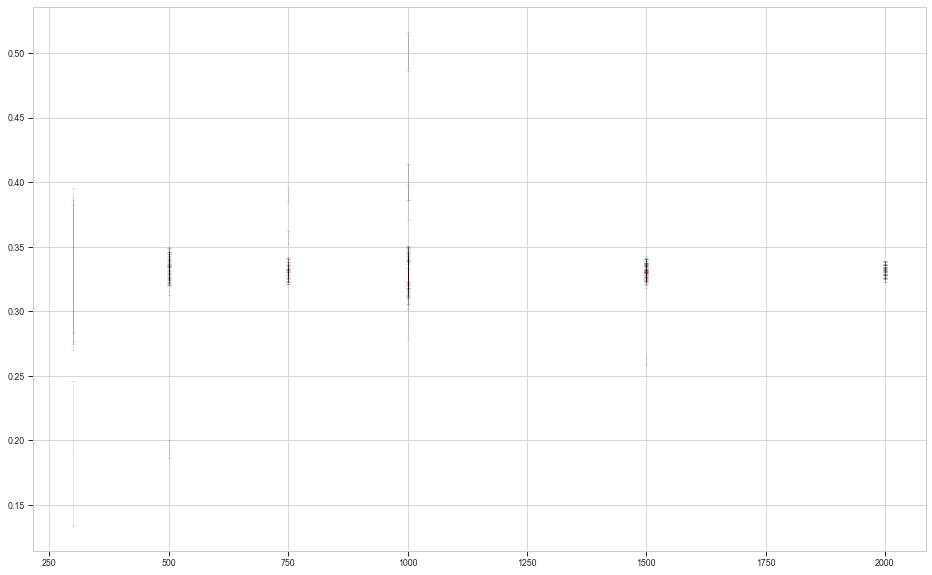

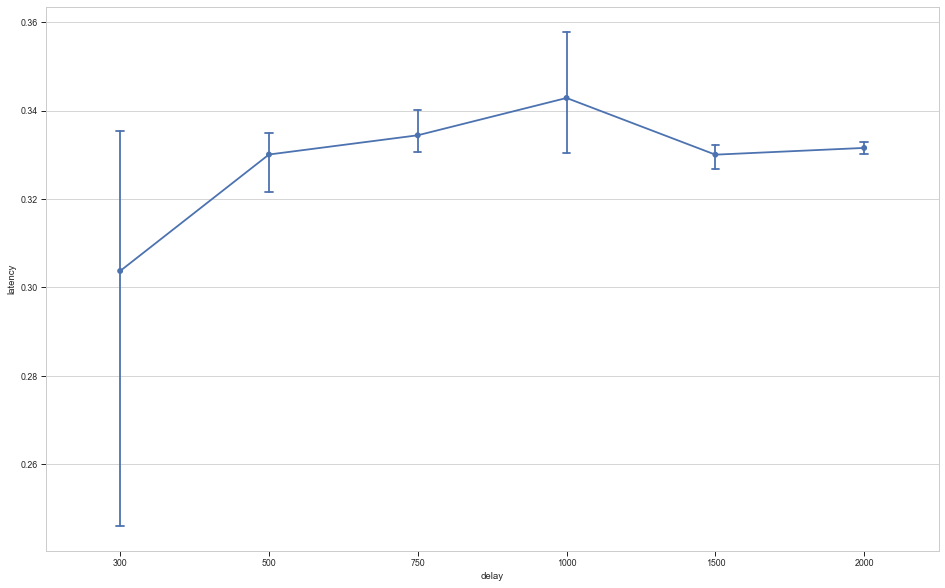

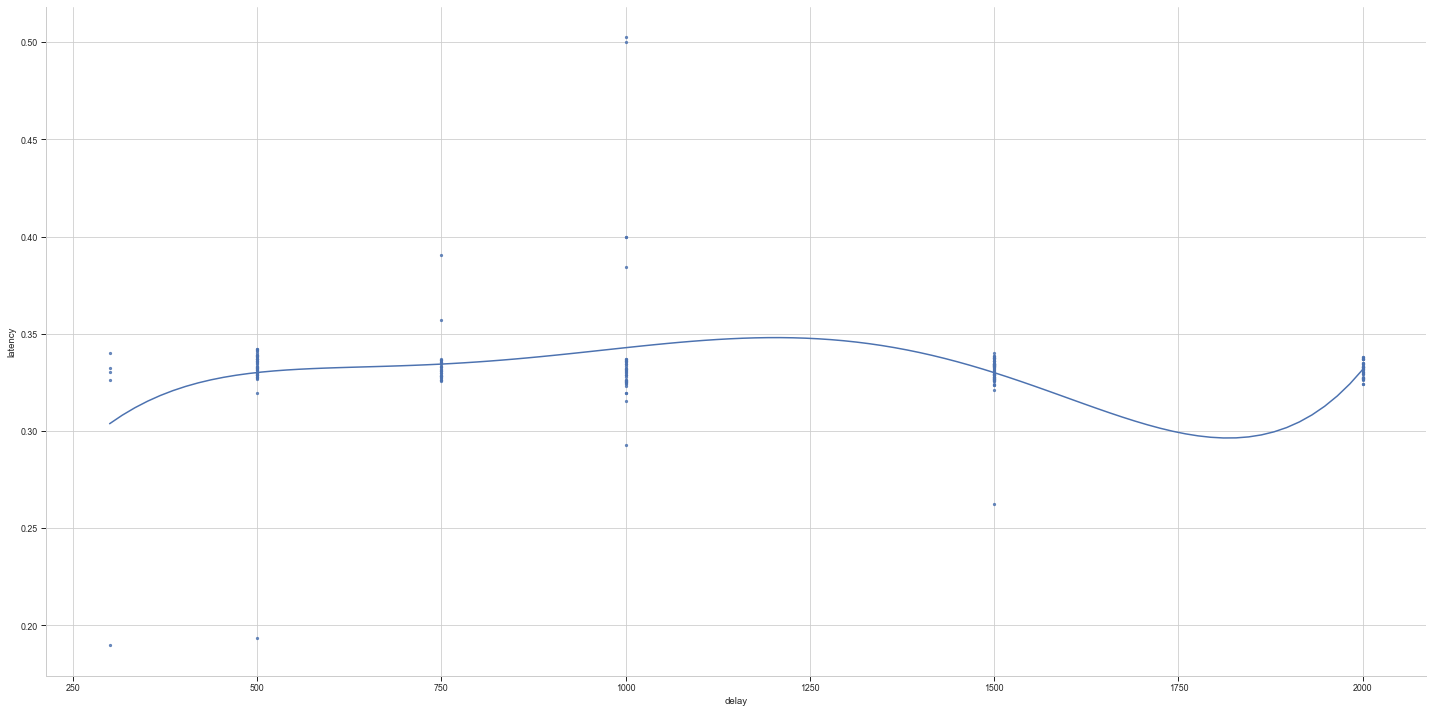

In [229]:
pageName = 'Test1'
saveGraphs = True

savePath = 'images/graphs/'+pageName

df = pd.read_excel (r'data/latency/latency_nuvolaPunti.xlsx', sheet_name=pageName) #for an earlier version of Excel, you may need to use the file extension of 'xls'


delayPoints = df['delay'].to_numpy()
latencyPoints = df['latency'].to_numpy()
marginErrPoints = df['marginErr'].to_numpy()
#testPoints = df['Test'].to_numpy()
maxPoints = df['max'].to_numpy()
minPoints = df['min'].to_numpy()

plt.style.use('seaborn-whitegrid')
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}    

sns.set_context("paper", rc = paper_rc)  

plt.figure(figsize=(16,10))
#df.plot.scatter(x='delay', y='latency', color='gray', s=1)
plt.errorbar(delayPoints, latencyPoints,  yerr=marginErrPoints, markersize=1, fmt='1', color ='red', ecolor='black', capsize=2, barsabove = False, alpha =0.1)
#plt.legend(errPlot, df['Test'])
if saveGraphs == True:
    plt.savefig(savePath+'dispersion.png', format='png', dpi=300)
fig, ax = plt.subplots()

fig.set_size_inches(16, 10)
if pageName in ["AllTests", "AllTest3"]:
    #Error plot
    sns.pointplot('delay', 'latency', hue='Test', markers=["2", "x", "+", "^","1"], data=df, capsize=.05, yerr= marginErrPoints, height=5, aspect = 2, err_style="bars", ci=95)
    if saveGraphs == True:
        plt.savefig(savePath+'pointPlot.png', format='png', dpi=300)
    #Smote plot
    
    sns.lmplot('delay', 'latency', hue ='Test',data=df,  ci=None, order=5,height=5, aspect = 2, truncate=True, legend_out=True, scatter_kws={"s": 0.5})
    if saveGraphs == True:
        plt.savefig(savePath+'smote.png', format='png', dpi=300)
        
    #sns.set(style="ticks")

    sns.lmplot(x="delay", y="latency", col="Test", hue="Test", data=df,
           col_wrap=3, ci=95, palette="muted", height=4, aspect = 2, order=5, truncate = True,
           scatter_kws={"s": 4, "alpha": 1})
    if saveGraphs == True:
        plt.savefig(savePath+'AnscombesQuartet2.png', format='png', dpi=300)
   
else :
    #Error plot
    sns.pointplot('delay', 'latency', data=df, capsize=.05, yerr= marginErrPoints,  err_style="bars", ci=95)
    if saveGraphs == True:
        plt.savefig(savePath+'pointPlot.png', format='png', dpi=300)
        
    #Smote plot
    sns.lmplot('delay', 'latency',data=df,  ci=None, order=5, height=10, aspect = 2, truncate=True, legend_out=True, scatter_kws={"s": 5})
    if saveGraphs == True:
        plt.savefig(savePath+'smote.png', format='png', dpi=300)
        
#sns.residplot('delay', 'latency',data=df, lowess=True, color="g")
#sns.jointplot('delay', 'latency',data=df, kind="hex", color="#4CB391")
        
#sns.regplot(x='delay', y='latency',ci=None, data=df)
#plt.savefig(pageName+'.png', format='png', dpi=300)
plt.show()